In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
# step 2 importing data file and starting data into a variable
cricket_data=pd.read_csv("cricket.csv")
cricket_data.head()

,Obs,DravidScr,BatFirst,Wicket 15,India Win
0,1,15,0,3,1
1,2,17,0,4,1
2,3,29,0,1,0
3,4,25,1,0,0
4,5,29,0,2,0


In [3]:
# display total no of records in a datafile
print("# of Obs in Originaal Dataset: " + str(len(cricket_data.index)))

# of Obs in Originaal Dataset: 18


<AxesSubplot:xlabel='DravidScr', ylabel='count'>

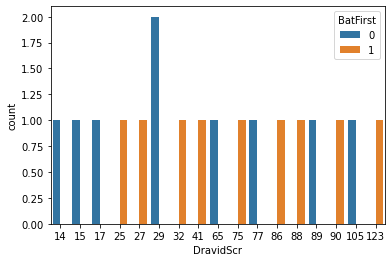

In [4]:
sns.countplot(x="DravidScr", hue="BatFirst",data=cricket_data)

<AxesSubplot:ylabel='Frequency'>

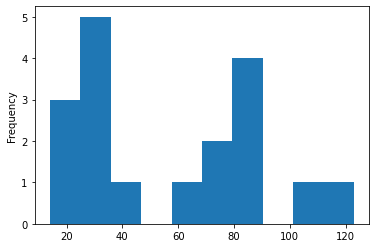

In [6]:
cricket_data["DravidScr"].plot.hist()

In [7]:
cricket_data.isnull()

,Obs,DravidScr,BatFirst,Wicket 15,India Win
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [8]:
cricket_data.isnull().sum()

Obs          0
DravidScr    0
BatFirst     0
Wicket 15    0
India Win    0
dtype: int64

<AxesSubplot:>

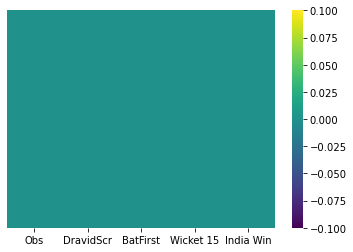

In [9]:
sns.heatmap(cricket_data.isnull(),yticklabels=False,cmap='viridis')

In [10]:
x=cricket_data.drop("India Win",axis=1)
y=cricket_data['India Win']
print(x)

    Obs  DravidScr  BatFirst  Wicket 15
0     1         15         0          3
1     2         17         0          4
2     3         29         0          1
3     4         25         1          0
4     5         29         0          2
5     6         41         1          2
6     7         14         0          3
7     8         27         1          1
8     9         32         1          0
9    10         75         1          2
10   11         88         1          0
11   12        105         0          0
12   13        123         1          1
13   14         86         1          1
14   15         90         1          2
15   16         65         0          3
16   17         89         0          2
17   18         77         0          4


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logmodel=LogisticRegression()

In [15]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [16]:
prediction=logmodel.predict(x_test)

In [17]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       1.00      0.50      0.67         6\n           1       0.00      0.00      0.00         0\n\n    accuracy                           0.50         6\n   macro avg       0.50      0.25      0.33         6\nweighted avg       1.00      0.50      0.67         6\n'

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_test,prediction)

array([[3, 3],
       [0, 0]], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
# anything above 70 is very good model
accuracy_score(y_test,prediction)

0.5